# **Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [ ]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# **Data Cleaning**

In [ ]:
# Display the first few rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Fill missing values for 'age' with the median age
df['age'].fillna(df['age'].median(), inplace=True)

In [ ]:
# Fill missing values for 'embarked' with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [ ]:
# Fill missing values for 'embark_town' with the mode
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [ ]:
# Convert 'deck' to string type to handle missing values properly
df['deck'] = df['deck'].astype(str)
# Fill missing values for 'deck' with a placeholder ('Unknown')
df['deck'].fillna('Unknown', inplace=True)

In [ ]:
# Drop 'alive' column as it's redundant with 'survived'
df.drop(columns=['alive'], inplace=True)

In [ ]:
# Check for any remaining missing values
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alone          0
dtype: int64


# **Exploratory Data Analysis**

In [ ]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  891.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.361582    0.523008    0.381594   
std       0.486592    0.836071   NaN   13.019697    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   22.000000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   35.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alone  
count   89

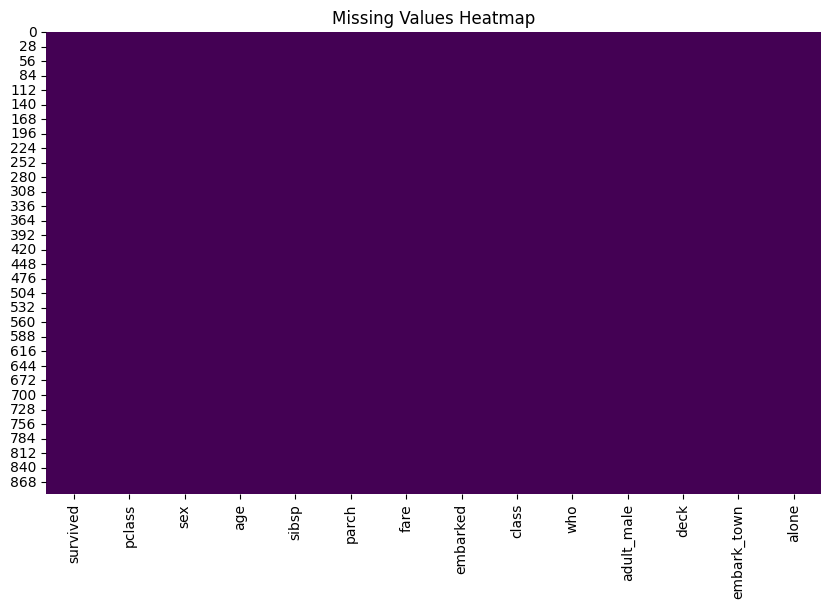

In [ ]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

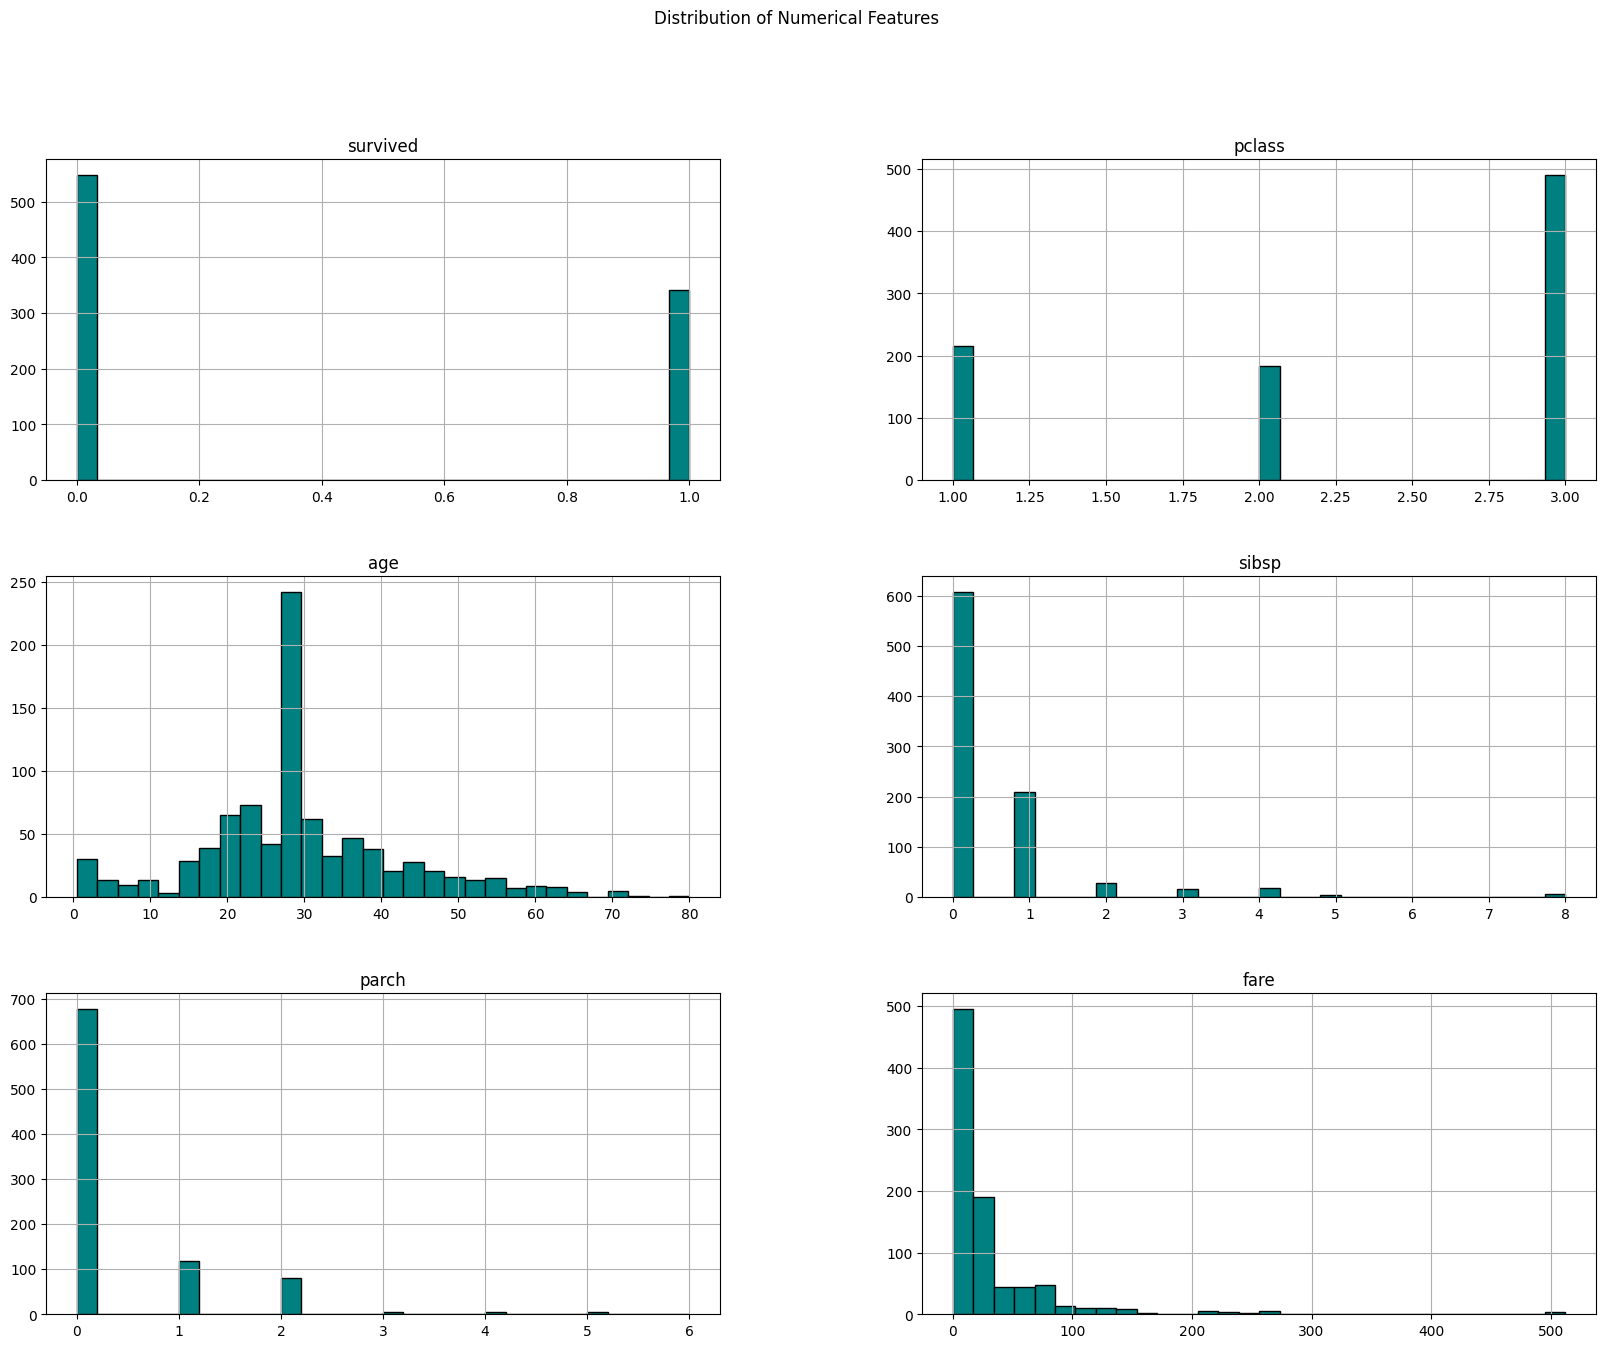

In [ ]:
# Distribution of numerical features
df.hist(bins=30, figsize=(20, 15), color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

<ipython-input-14-dbae49908f4e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set2')


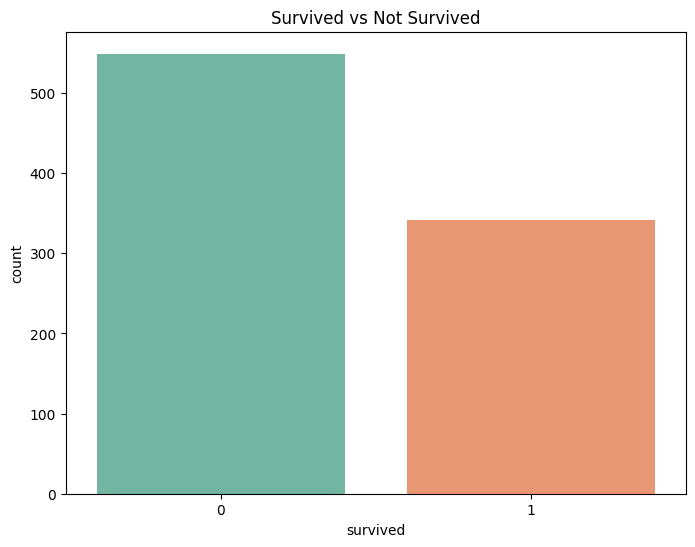

In [ ]:
# Survived vs Not Survived
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df, palette='Set2')
plt.title('Survived vs Not Survived')
plt.show()

<ipython-input-15-142366c60e8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='Set1')


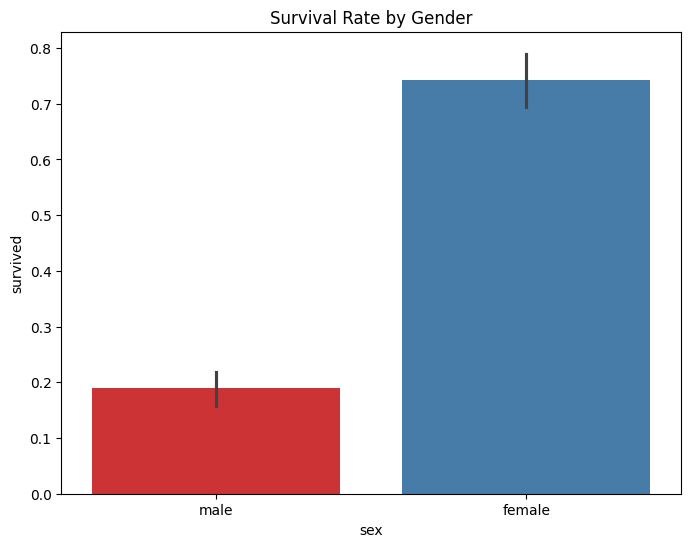

In [ ]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df, palette='Set1')
plt.title('Survival Rate by Gender')
plt.show()

<ipython-input-16-1b7860bbf81b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, palette='Set3')


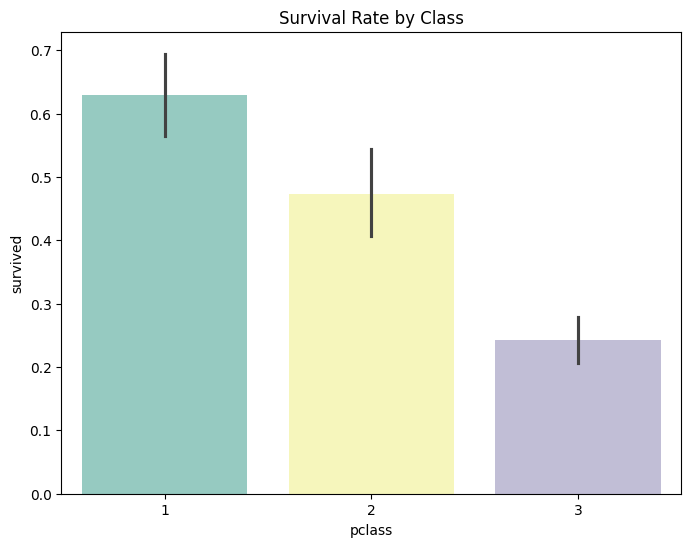

In [ ]:
# Survival rate by class
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df, palette='Set3')
plt.title('Survival Rate by Class')
plt.show()

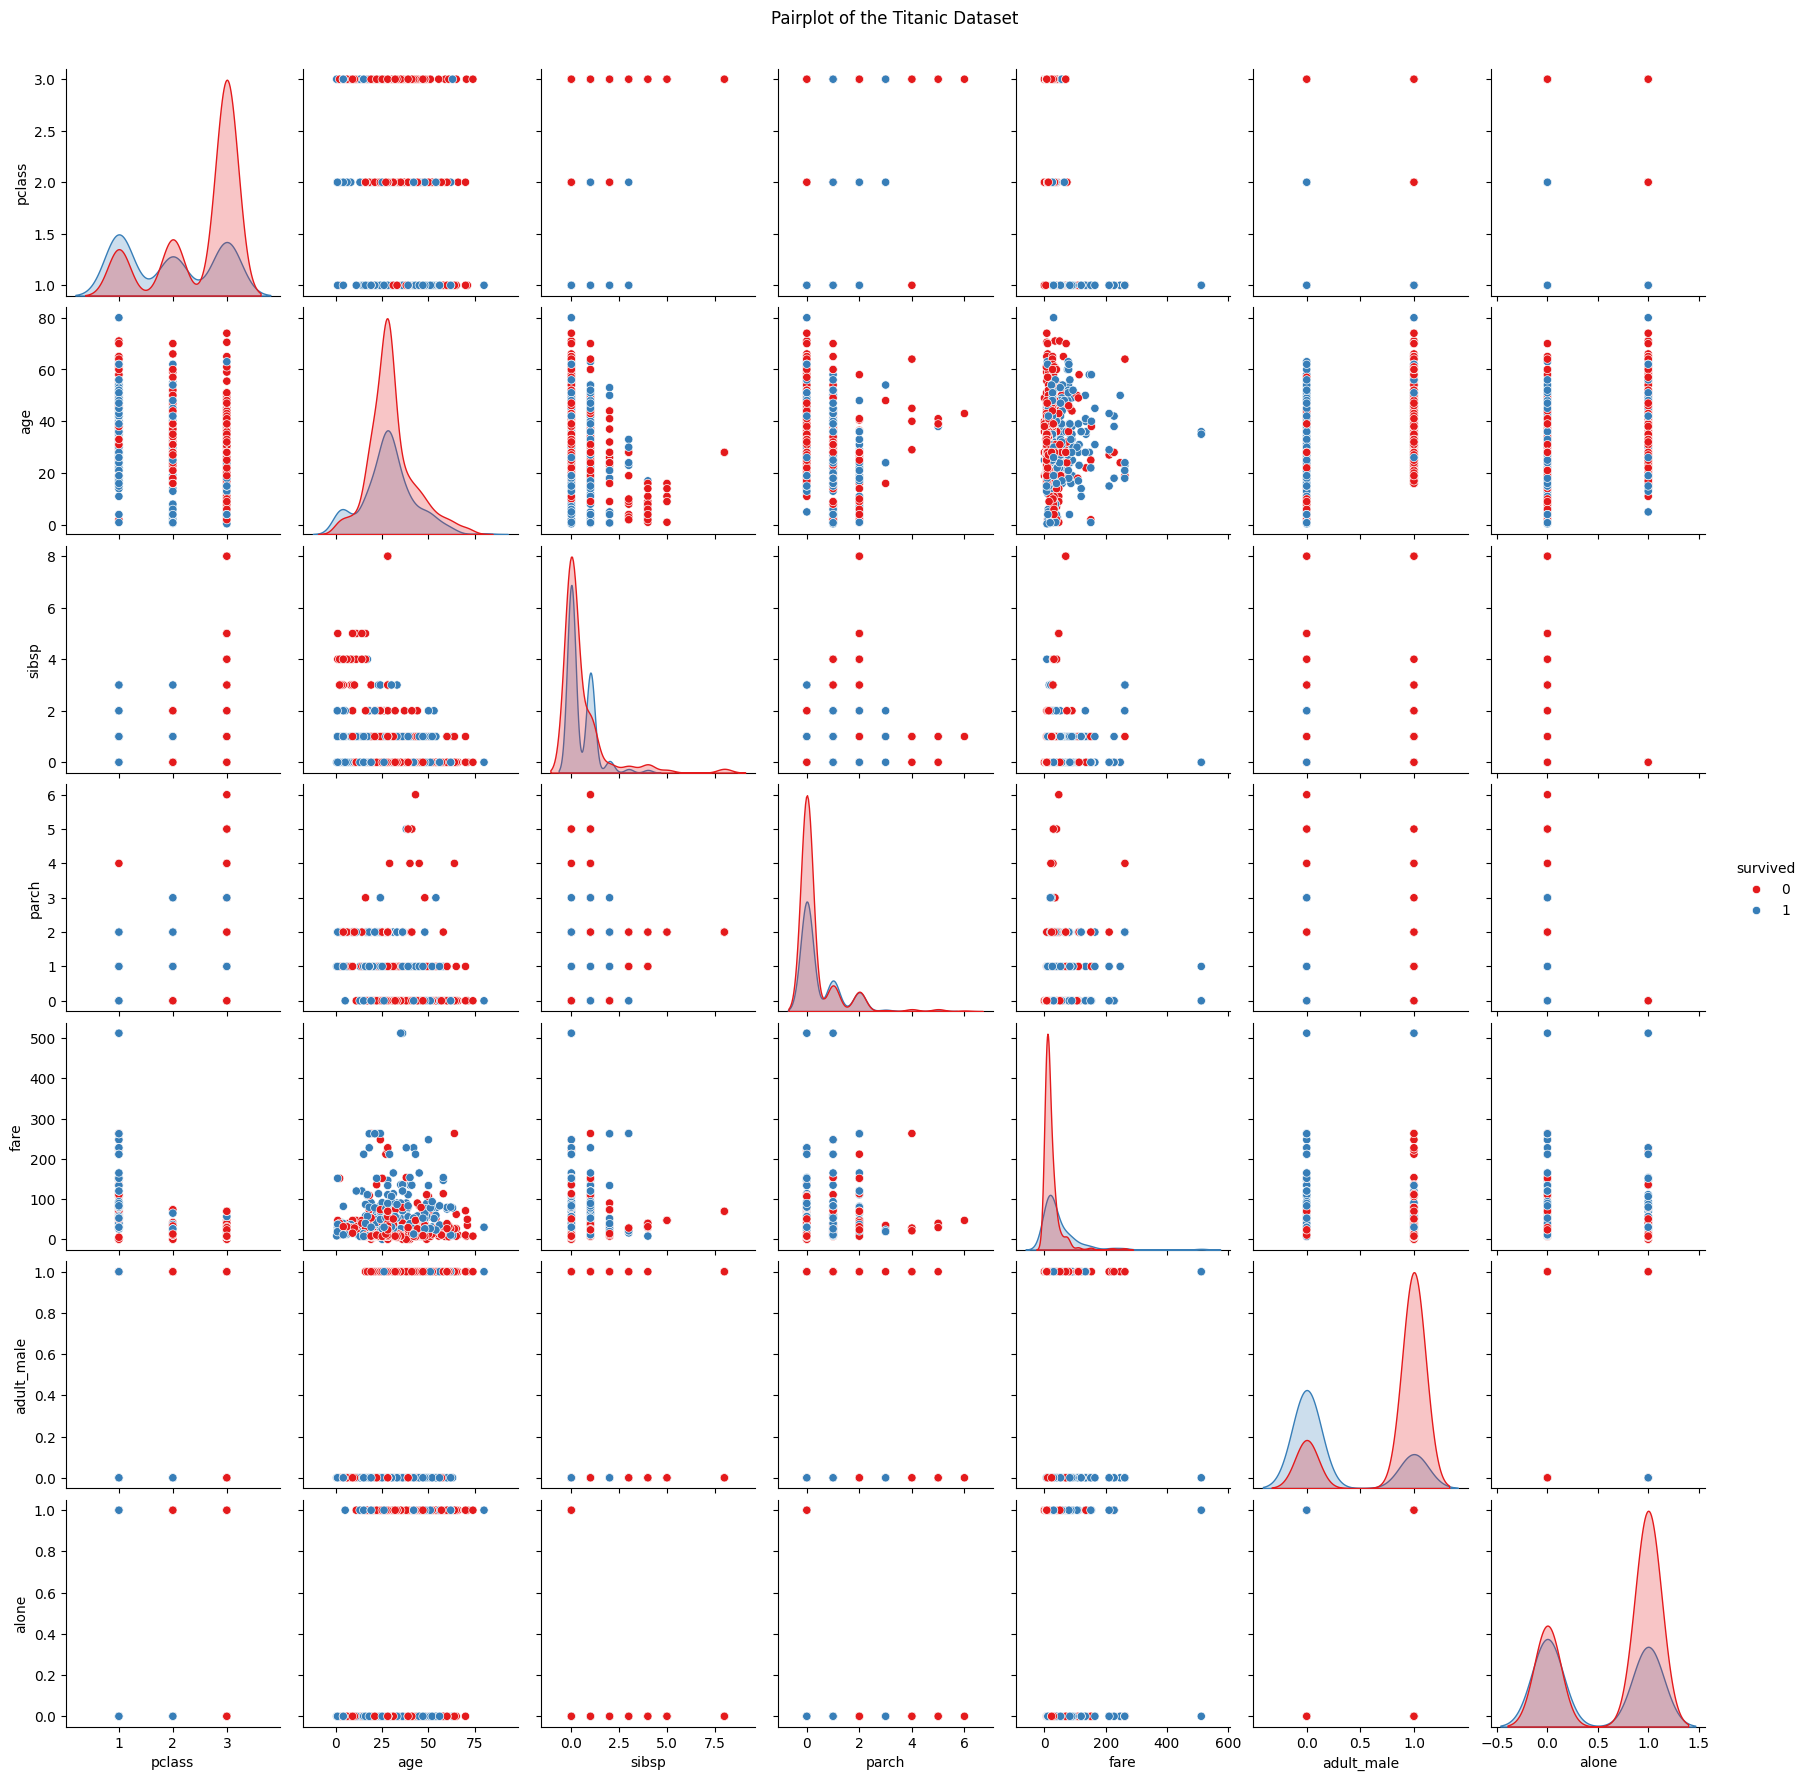

In [ ]:
# Pairplot of the dataset
sns.pairplot(df, hue='survived', palette='Set1')
plt.suptitle('Pairplot of the Titanic Dataset', y=1.02)
plt.show()

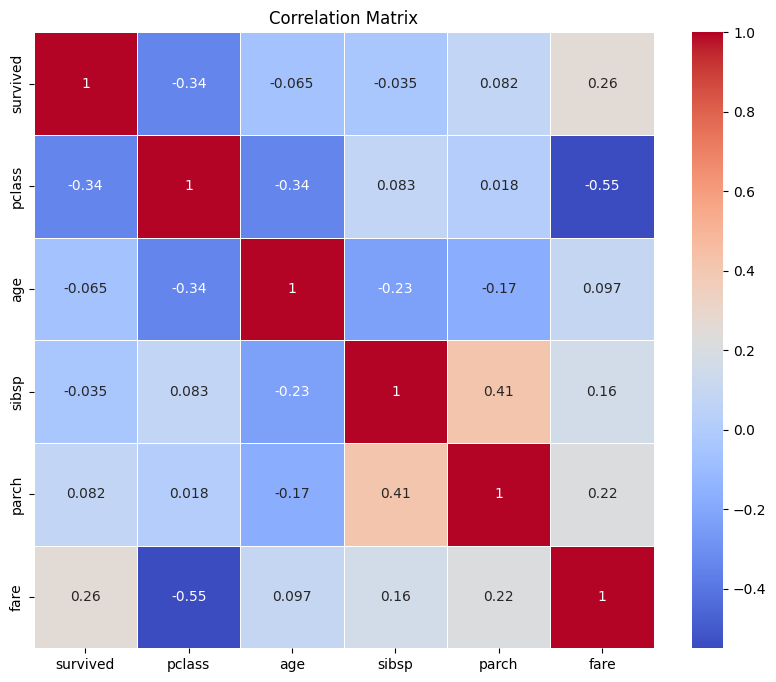

In [ ]:
# Correlation matrix (only numerical columns)
plt.figure(figsize=(10, 8))
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-20-27724c38c14f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare', data=df, palette='Set2')


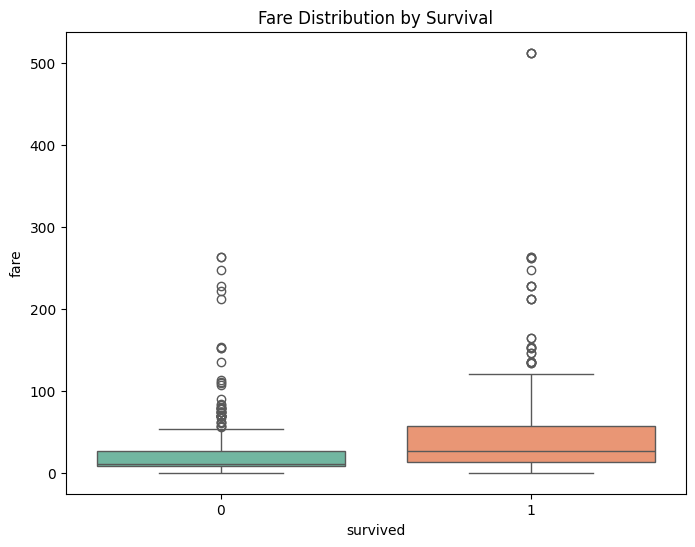

In [ ]:
# Analyzing 'fare' distribution by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='fare', data=df, palette='Set2')
plt.title('Fare Distribution by Survival')
plt.show()

<ipython-input-21-8b4927ef564a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df, palette='Set3')


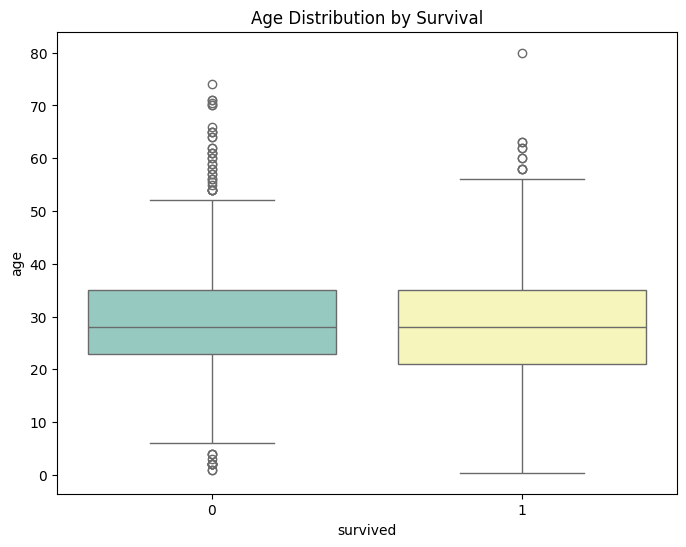

In [ ]:
# Analyzing 'age' distribution by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df, palette='Set3')
plt.title('Age Distribution by Survival')
plt.show()